In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28)

In [38]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

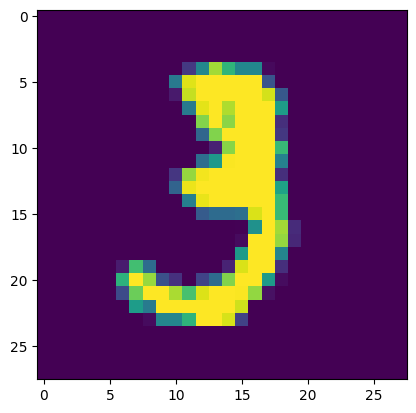

In [40]:
plt.imshow(x_train[10])

In [42]:
y_train[10]

3

In [44]:
x_train.shape

(60000, 28, 28)

In [46]:
len(x_train)

60000

In [60]:
x_train = x_train/255
x_test = x_test/255

In [64]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [66]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [68]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [70]:

model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape= (784,) ,activation='sigmoid')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8112 - loss: 0.7287
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9118 - loss: 0.3113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9203 - loss: 0.2829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.9253 - loss: 0.2715
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9255 - loss: 0.2655


In [162]:
#Evaluating the model
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9089 - loss: 0.3104


[0.27247193455696106, 0.9225000143051147]

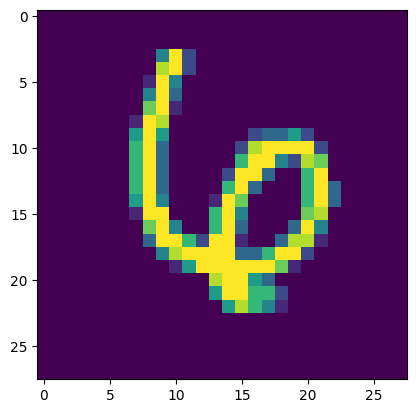

In [164]:
plt.imshow(x_test[22])

In [160]:
k = model.predict(x_test[22].reshape(1,784)) 
np.argmax(k)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


6

In [196]:
y_peddicted_Labels = [np.argmax(i) for i in model.predict(x_test_flattened)]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


In [184]:
# Building a confusion metrice to evaluate he performance 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    1,    1],
       [   0, 1121,    2,    2,    0,    1,    4,    1,    4,    0],
       [   8,   14,  907,   32,    8,    1,   12,    9,   37,    4],
       [   1,    0,   13,  948,    1,   11,    2,    8,   18,    8],
       [   1,    2,    2,    2,  916,    0,   14,    4,    8,   33],
       [   9,    5,    2,   56,    9,  745,   16,    6,   37,    7],
       [  11,    3,    4,    2,    7,    9,  917,    2,    3,    0],
       [   1,   12,   22,   10,    7,    1,    0,  940,    1,   34],
       [   8,   16,    6,   35,    9,   20,    9,   12,  853,    6],
       [  11,    7,    1,   13,   29,    4,    0,   25,    4,  915]])>

In [182]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'True value')

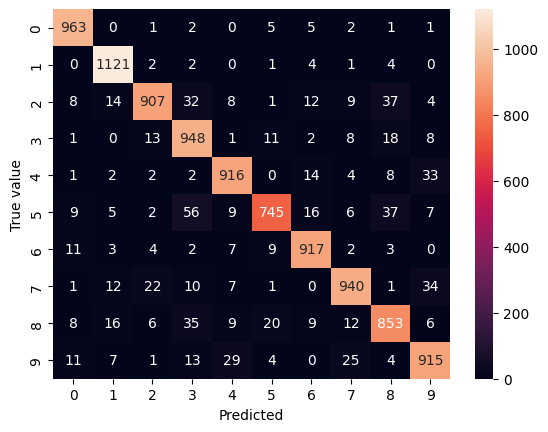

In [192]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")

In [218]:
#building another model with hidden layer
model2 = keras.Sequential(
    [
        #without keras flatten layer, because we are manually flattening the image to (x_train_flattened)
        #100 is hidden layer neurones and activation function is relu 
        keras.layers.Dense(100, input_shape= (784,) ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model2.fit(x_train_flattened,y_train,epochs=5)

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8750 - loss: 0.4540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9845 - loss: 0.0523


In [220]:
# evaluate model for training data
model2.evaluate(x_train_flattened, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9889 - loss: 0.0378


[0.03756023943424225, 0.9890166521072388]

In [222]:
# evaluate model for testing data
model2.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9722 - loss: 0.0849


[0.07429603487253189, 0.9765999913215637]

In [224]:
y_peddicted_Labels = [np.argmax(i) for i in model2.predict(x_test_flattened)]
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    1,    3,    1,    1,    2],
       [   0, 1128,    3,    0,    0,    1,    1,    0,    2,    0],
       [   4,    3, 1007,    4,    2,    0,    2,    4,    4,    2],
       [   0,    1,    4,  990,    1,    0,    0,    3,    3,    8],
       [   0,    0,    0,    0,  971,    0,    7,    0,    0,    4],
       [   2,    0,    0,   12,    1,  869,    4,    0,    2,    2],
       [   5,    3,    1,    1,    3,    4,  941,    0,    0,    0],
       [   0,    6,   11,    3,    4,    1,    1,  991,    1,   10],
       [   4,    3,    3,    7,    5,    5,    5,    2,  937,    3],
       [   1,    7,    0,    6,   20,    5,    1,    2,    5,  962]])>

Text(50.722222222222214, 0.5, 'True value')

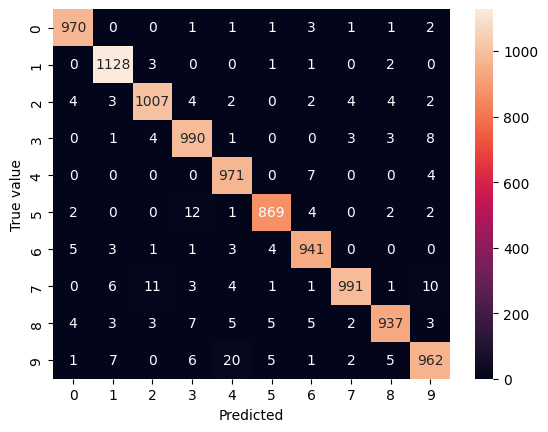

In [226]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")

In [236]:
#building another model with hidden layer
model3 = keras.Sequential(
    [
        #Flatten layer
        keras.layers.Flatten(input_shape=(28,28)),
  
        keras.layers.Dense(100 ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model3.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8754 - loss: 0.4385
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0.1358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9731 - loss: 0.0897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9795 - loss: 0.0682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9851 - loss: 0.0495
